# 소프트맥스 함수 (Softmax Function)

### 개념 요약
소프트맥스 함수는 다중 클래스 분류(multi-class classification) 문제에서 모델의 출력값을 확률 분포로 변환하는 활성화 함수임. 입력으로 들어온 여러 개의 실수 값(로짓, logits)을 0과 1 사이의 값으로 변환하며, 변환된 모든 값의 총합은 항상 1이 됨.

이러한 특성 덕분에, 각 클래스에 대한 예측 확률을 나타내는 데 매우 적합함. 예를 들어, [개, 고양이, 새]를 분류하는 모델의 출력 로짓이 `[2.0, 1.0, 0.1]`이라면, 소프트맥스는 이를 `[0.65, 0.24, 0.11]`과 같이 각 클래스일 확률로 변환해줌.

### 📐 수학적 배경
소프트맥스 함수 $S(y_i)$는 입력 벡터 $\mathbf{y}$의 각 요소 $y_i$에 대해 다음과 같이 정의됨.

$$ S(y_i) = \frac{e^{y_i}}{\sum_{j=1}^{C} e^{y_j}} \quad \text{for } i=1, ..., C $$

* $y_i$: 입력 벡터의 $i$번째 요소 (클래스 $i$에 대한 로짓)
* $e^{y_i}$: $y_i$에 대한 지수 함수 값
* $\sum_{j=1}^{C} e^{y_j}$: 모든 입력 요소의 지수 함수 값의 총합 (정규화 항)
* $C$: 전체 클래스의 개수

**수치 안정성(Numerical Stability) 문제**: 입력값 $y_i$가 매우 크면 $e^{y_i}$가 오버플로우(overflow)를 일으킬 수 있음. 이를 해결하기 위해 입력 벡터의 최댓값을 각 요소에서 빼주는 트릭을 사용함. 이 트릭은 최종 결과에 영향을 주지 않으면서 계산을 안정적으로 만듦.
$$ S(y_i) = \frac{e^{y_i - c}}{\sum_{j=1}^{C} e^{y_j - c}} \quad \text{where } c = \max(\mathbf{y}) $$

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
신경망의 마지막 레이어에서 나온 출력 점수(로짓)를 가정하여 예제 데이터를 생성함. 3개의 클래스를 분류하는 상황을 가정.

In [2]:
# 클래스 3개에 대한 모델의 출력 로짓(logits)이라고 가정
logits = np.array([2.0, 1.0, 0.1])
print(f"입력 로짓 (logits): {logits}")

입력 로짓 (logits): [2.  1.  0.1]


### 핵심 로직 구현 (Code Implementation)
수치적으로 안정화된(numerically stable) 소프트맥스 함수를 구현함.

In [3]:
def softmax(x):
    """수치적으로 안정적인 소프트맥스 함수를 계산함"""
    # 1. 오버플로우 방지를 위해 입력값에서 최댓값을 빼줌
    c = np.max(x)
    stable_x = x - c
    print(f"안정화된 로짓 (x - max(x)): {stable_x}")
    
    # 2. 각 요소에 지수 함수 적용
    exp_x = np.exp(stable_x)
    print(f"지수 적용 결과 (exp(x)): {np.round(exp_x, 4)}")
    
    # 3. 지수 함수의 합 계산 (정규화 항)
    sum_exp_x = np.sum(exp_x)
    print(f"지수 결과의 합 (sum(exp(x))): {sum_exp_x:.4f}")
    
    # 4. 각 요소를 합으로 나누어 확률 계산
    probabilities = exp_x / sum_exp_x
    return probabilities

# 소프트맥스 함수 적용
probabilities = softmax(logits)

print("--- 최종 결과 ---")
print(f"소프트맥스 확률: {np.round(probabilities, 4)}")
print(f"확률의 총합: {np.sum(probabilities):.4f}")

안정화된 로짓 (x - max(x)): [ 0.  -1.  -1.9]
지수 적용 결과 (exp(x)): [1.     0.3679 0.1496]
지수 결과의 합 (sum(exp(x))): 1.5174
--- 최종 결과 ---
소프트맥스 확률: [0.659  0.2424 0.0986]
확률의 총합: 1.0000


### 📊 결과 확인 및 시각화 (Results & Visualization)
소프트맥스 함수를 통해 변환된 로짓 값을 확률 분포로 시각화하여 결과를 직관적으로 확인함. 가장 높은 로짓 값을 가졌던 클래스가 가장 높은 확률을 갖게 됨.

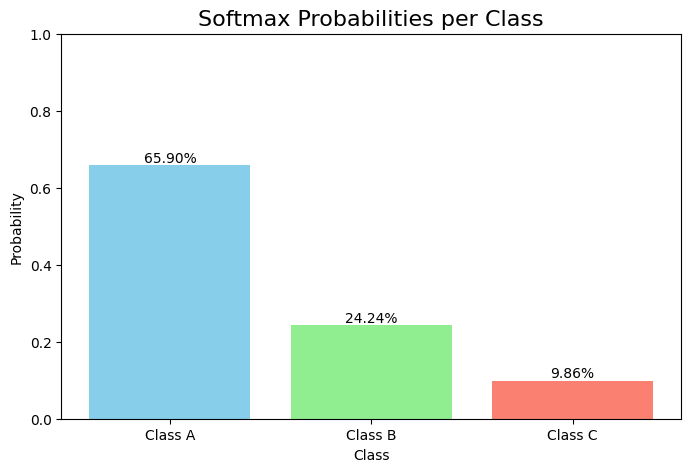

In [4]:
class_names = ['Class A', 'Class B', 'Class C']

plt.figure(figsize=(8, 5))
bars = plt.bar(class_names, probabilities, color=['skyblue', 'lightgreen', 'salmon'])

plt.title('Softmax Probabilities per Class', fontsize=16)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.ylim(0, 1.0)

# 각 막대 위에 확률 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2%}', va='bottom', ha='center')

plt.show()

### 고려사항 (Considerations)

* **크로스 엔트로피 손실 함수와의 결합**: 소프트맥스 함수는 다중 클래스 분류 모델의 학습 시, 크로스 엔트로피(Cross-Entropy) 손실 함수와 거의 항상 함께 사용됨. 이 조합은 모델이 정답 클래스의 확률은 높이고 오답 클래스의 확률은 낮추도록 효과적으로 학습시킴.
* **시그모이드(Sigmoid)와의 차이점**: 시그모이드는 각 출력이 독립적인 이진 분류(binary classification)나 다중 레이블 분류(multi-label classification, 예: 하나의 이미지에 개와 고양이가 모두 있음)에 사용됨. 반면, 소프트맥스는 여러 클래스 중 단 하나만 정답인 상호 배타적인 다중 클래스 분류(multi-class classification)에 사용됨.

### 최종 요약 (Conclusion)
소프트맥스 함수는 신경망의 로짓(raw scores)을 다중 클래스 분류 문제에 적합한 확률 분포로 변환하는 핵심적인 요소임. 입력값의 상대적인 크기를 보존하면서 그 총합이 1이 되도록 정규화하여, 모델의 예측을 직관적으로 해석 가능한 확률로 만들어 줌.

구현 시에는 지수 함수의 특성으로 인한 오버플로우를 방지하기 위해 입력값에서 최댓값을 빼주는 **수치 안정화 기법**을 적용하는 것이 매우 중요함.